# <center> Econ 373: Computational Economics (with Python) </center>
## <center> Algorithm Competition 1 (group) </center>

# <font color='#D4AF37'>Name:</font>

# <font color='#D4AF37'>Group Name:</font>

# <font color='#D4AF37'> Instructions:</font>
## The Algorithm Competition has two major sections:

### The first section is checking your understanding of the competition environment.

Your group is to answer a series of questions.
- For each question, answer using the cells below the question cells.
    - The input refers to the arguments passed to the function. (if required)
    - The output refers to what is returned by the function. (if required)
- We may require output to file or screen within a function, but if that is the case it will be clearly specified.
- Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
- If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
- Save all of your code into a .ipynb file (jupyter notebook file) and name it as **username_ac1.ipynb**, where username is the username of the group member who submits the homework.
    - **You should remove any test cells/code.**
    - Only include answers for the comprehension questions.
    - If your submitted **username_ac1.ipynb** file throws any error by clicking Kernel--> Restart and Run All, grading will stop at the failing cell; you will receive credit only for the work that executed successfully up to that point.

### The second section is designing a function/algorithm for the competition.

Your group select one corresponder sending me the completed algorithm via my email nguye535@purdue.edu. The algorithm is written in a separated **group_name_ac1.ipynb** file:
- The algorithm required input/output are outlined in the second part of this file.
- The algorithm/function must be named **group_name_ac1**
- You must follow all the required conditions to be eligible for competition.
- Bonus points will be based on how many groups you outperform. Details for bonus points will be announced during the day of the competition

# The Guessing Game
## Nagel (AER, 1995)

More details can be found in the original paper posted on Brightspace

## Game environment

Consider the following game:
 - **Players:** $N$ agents
 - **Action:**
    - Every agent knows the float **p**.
    - Given **p**, $Agent_i$ pick an **integer** number $c_i$ between *0* and *100* to be their guess.
    - Agents submit their guessed numbers $c_i$ simultaneously and independently.
 - **Rule/Winning Condition:**
     - Let $\bar{c} = \dfrac{1}{N} \sum_{i=1}^N c_i = \dfrac{c_1 + c_2+...+c_N}{N}$ be the mean of all the guessed numbers.
     - We call $c_p = p \times \bar{c}$ the target number. The distance/error of the guess $c_i$ from the target $c_p$ is measured as $d_i = |c_i - c_p|$.
     - The winner is the agent whose guessed number $c^{\star}$ is the **closest** to the target $c_p$, or has the smallest distance $d_i$ amongst all others.
     - If there is a tie, the prize is divided equally among the winners.
 - The game is played for 10 rounds by the same group of agents.
 - After each round, all the guessed numbers, the mean of the guesses $\bar{c}$, the target $c_p$, the winning guess $c^{\ast}$ are presented to the agents.

##  <font color='#D4AF37'> Environment Comprehension (10 points)</font>

Answer the series of the following questions to check if you are understanding the game explained in Nagel (1995).

### Question 1
Suppose our class has 20 groups, each chooses an **integer** between 0 and 100. The winner of the current round is the one whose guess is closest to two-thirds of the average of all the guesses for this particular round. Groups are numbered by their position in the list (Group 1 is the first number, Group 2 the second, …). Assume the 20 groups has these first round guesses:
```python
    86, 57, 31, 46, 48, 43, 44, 10, 18, 54, 29, 59, 75, 5, 54, 30, 65, 17, 0, 81
```
- a) Based on the information above, fill in the details of the variables to complete the game environment descriptions in Python in the code chunk below.
- b) Write a function called **roundInfo** to print out the results of the round given a list of guesses submitted: the target $c_p$, the winning guess $c^{\ast}$, and the list of winning groups (based on their orderings in the list of guess, so in the example, Group 1 submits the guess 86, Group 2 submits the guess 57, and so on...).
    - **Input**: two arguments
        - a list of integers storing the guesses at the start of the round. Example:
        ```python
        [100,80,60,40]
        ```

        - a float p control the relative distance from the sample average of the round's guesses. Example
        ```python
          0.5
        ```
    - **Output**: two values:
        - an integer storing the winning guess $c^{\ast}$ after the current round completed
        - an integer storing the target $c_p$ after the current round completed

- (c) Run your defined function and display the requested information (the target, the winning guess, and the winning groups).



In [1]:
#change these assignments to values corresponding to the game described in Question 1
N = 20
p = 2/3
#the first round guesses
guesses0 = [86, 57, 31, 46, 48, 43, 44, 10, 18, 54, 29, 59, 75, 5, 54, 30, 65, 17, 0, 81]


In [2]:
def roundInfo(guesses,p):
    #you can write the function requested in part b) here
    N = len(guesses)

    average = sum(guesses)/N

    target = round(p*average)

    diffs = []
    for g in guesses:
        diff = abs(g - target)
        diffs.append(diff)

    min_diff = min(diffs)

    winning_guess = None
    for i in range(N):
        if diffs[i] == min_diff:
            winning_guess = guesses[i]
            break

    winning_groups = []
    for i in range(N):
        if guesses[i] == winning_guess:
            winning_groups.append(i + 1)

    # Print results
    print(f"Target: {target}")
    print(f"Winning Guess: {winning_guess}")
    print(f"Winning Groups: {winning_groups}")

    return winning_guess, target, winning_groups

In [3]:
#c) output the requested information
#store the target of the first round and winning guess of the first round
win_guess1, target1, winning_groups1 = roundInfo(guesses0,p)

Target: 28
Winning Guess: 29
Winning Groups: [11]


### Question 2
In the second round, the first group changes their guessing strategy.
- They instead submit the previous round target *rounded to nearest integer* to increase likelihood of winning. We call this strategy level-one reasoning strategy. For example, if previous round target $c_p$ is 20, then Group 1 submit a new guess 20, instead of previous round guess 86.
- The rest of the groups submit the same guess, calling level-zero reasoning strategy. So the guesses for Group 2 to Group 20 remain:
```python
    57, 31, 46, ... 17, 0, 81
```

Use the Round-1 guesses from Question 1 and the same value of p. Now Group 1 applies level-one reasoning, while the rest of the groups applies level-zero reasoning strategy. Fill in the new guesses for second round, and print out the new target, the new winning guess, and winning group(s) for the second round below using **roundInfo** function.

In [4]:
# Step 1: copy round 1 guesses
guesses2 = guesses0.copy()

# Step 2: Group 1 switches to level-one: previous target rounded
guesses2[0] = target1

#the second round information
win_guess2, target2, winning_groups2 = roundInfo(guesses2, p)

Target: 26
Winning Guess: 28
Winning Groups: [1]


### Question 3
In the third round, more groups start applying level-$k$ reasoning. In particular, if second round target is 36:
- Group 2 switches to a level-one reasoning strategy, submitting 36 as the new guess (round 2 target).
- Anticipating that others may also adopt level-one reasoning, Group 1 best-responds by submitting 24, which is two-thirds of the previous round target ($2/3 \times $ round 2 target).
- All remaining groups repeat their Round 2 guesses (level-zero reasoning). Their guesses remain:
```python
  31, 46, ... 17, 0, 81
```

Fill in the new guesses for the third round, and print out the new target, the new winning guess for the third round below using **roundInfo** function.

In [5]:
guesses3 = guesses2.copy()

# Group 1 best responds to others going level-one: p * target2
guesses3[0] = round(p * target2)

# Group 2 now uses level-one: previous round target
guesses3[1] = target2

win_guess3, target3, winning_groups3 = roundInfo(guesses3, p)

Target: 25
Winning Guess: 26
Winning Groups: [2]


### Question 4
You will simulate how groups update their guesses across rounds using (simplified) level-$k$ reasoning:

 - **Round 1 (Initial condition)**: Each group starts with initial guess from Question 1.
 - **Round 2**:
   - Groups update new guesses as explained in Question 2.
 - **Round 3**:
   - Groups update new guesses as explained in Question 3.
 - **From Round 4 onward**:
    - In round $r$, the group $r-1$ apply level-one reasoning strategy, which changes their guess to the target *rounded to the nearest integer* from the previous round $r-1$.
    - group $r-2$ apply level-two reasoning strategy, which changes their guess to two-thirds of the target from the previous round $r-1$, and rounded their guess to the nearest integer.
    - group $r-3$ apply level-three reasoning strategy, which anticipates some groups might apply level-two reasoning strategy, and change their guess to two-thirds of two-thirds of the target from the previous round $r-1$, and rounded their guess to the nearest integer.
    - This level-$k$ reasoning learning pattern continues so that the first group now applying level-$r-1$ reasoning strategy, which they anticipate other groups might apply level-$r-2$ reasoning, so they change their guess accordingly.
    - The remaining groups $r,r+1,...,N$ keep their previous guesses from round (r−1) (level-zero reasoning strategy).
 - Game ends after 10 rounds.

🔹 Example walk-through (simplified version):

Suppose: There are 4 groups with $p=2/3$.
- They start with 4 initial guesses: 80, 60, 40 and 20.
- In round 2, Group 1 applies level-one reasoning, and adjusts their guess to 33 (round 1 target). The rest applies level-zero reasoning and keep the same guess.
- In round 3, Group 1 applies level-two reasoning, and adjusts their guess to 23 ($2/3 \times 25 \approx 16$); Group 2 applies level-one reasoning, and adjust their guess to 25 (round 2 target). Group 3 and Group 4 apply level-zero reasoning and keep the same guesses.
- In round 4, Group 1 applies level-three reasoning, and adjusts their guess to 7 ($2/3 \times 2/3 \times 16 \approx 7$); Group 2 applies level-two reasoning, and adjusts their guess to 10 ($2/3 \times 16 \approx 10$); Group 3 apply level-one reasoning, and adjust their guess to 16 (round 3 target). Finally, Group 4 apply level-zero reasoning and keep the same guess.
- In round 5, Group 1 applies level-four reasoning, and adjusts their guess to 2 ($2/3 \times 2/3 \times 2/3 \times 8 \approx 2$); Group 2 applies level-three reasoning, and adjusts their guess to 3 ($2/3 \times 2/3 \times 8 \approx 3$); Group 3 applies level-two reasoning, and adjust their guess to 5 ($2/3 \times 8 \approx 5$); Group 4 now start applying level-one reasoning, and adjust their guess to 8 (round 4 target).
- The same increasements in reasoning proceeds and we have the following table:

| Round | Guesses              | Winning Guess | Target (rounded to integer) | Winner(s) Group |
|-------|----------------------|---------------|----------------|--------------|
| 1     | [80, 60, 40, 20]     | 40            | 33             | Group 3      |
| 2     | [33, 60, 40, 20]     | 20            | 25             | Group 4      |
| 3     | [16, 25, 40, 20]     | 16            | 16             | Group 1      |
| 4     | [7, 10, 16, 20]      | 7             | 8              | Group 1    |
| 5     | [2, 3, 5, 8]         | 3             | 3              | Group 2 |
| 6     | [0, 0, 1, 2]         | 0             | 0              | Groups 1, 2  |
| 7     | [0, 0, 0, 0]         | 0             | 0              | Groups 1, 2, 3, 4  |
| 8     | [0, 0, 0, 0]         | 0             | 0              | Groups 1, 2, 3, 4  |
| 9     | [0, 0, 0, 0]         | 0             | 0              | Groups 1, 2, 3, 4  |
| 10    | [0, 0, 0, 0]         | 0             | 0              | Groups 1, 2, 3, 4  |


Now using the above pattern in development in level-k reasoning and initial guesses from Question 1 and report all 10 rounds via a Pandas DataFrame with columns:

- Round (1–10)

- Guesses (list of the guesses at the start of the round)

- Winning Guess

- Target


In [6]:

import numpy as np
import pandas as pd

# Parameters
p = 2/3
rounds = 10

# Initial guesses
guesses = [
    86, 57, 31, 46, 48, 43, 44, 10, 18, 54,
    29, 59, 75, 5, 54, 30, 65, 17, 0, 81
]

# Store history
history = []
history.append({
    "Round": 1,
    "Guesses": guesses.copy(),
    "Target": round(p * np.mean(guesses))
})

# Simulation
for r in range(2, rounds + 1):
    prev_target = history[-1]["Target"]
    new_guesses = guesses.copy()

    # Level-K
    for k in range(1, r):
        idx = (r - k) - 1  # zero-based index
        if idx < 0 or idx >= len(new_guesses):
            continue
        if k == 1:
            new_guesses[idx] = prev_target
        else:
            new_guesses[idx] = round((p ** (k - 1)) * prev_target)

    guesses = new_guesses
    history.append({
        "Round": r,
        "Guesses": guesses.copy(),
        "Target": round(p * np.mean(guesses))
    })

# Convert to DataFrame
df = pd.DataFrame(history)

# Expand guesses into separate columns
guesses_df = pd.DataFrame(df["Guesses"].tolist())
guesses_df.columns = [f"Group_{i+1}" for i in range(len(guesses_df.columns))]

result = pd.concat([df.drop(columns=["Guesses"]), guesses_df], axis=1)

print("Q4 Results", result)

Q4 Results    Round  Target  Group_1  Group_2  Group_3  Group_4  Group_5  Group_6  \
0      1      28       86       57       31       46       48       43   
1      2      26       28       57       31       46       48       43   
2      3      25       17       26       31       46       48       43   
3      4      24       11       17       25       46       48       43   
4      5      23        7       11       16       24       48       43   
5      6      21        5        7       10       15       23       43   
6      7      20        3        4        6        9       14       21   
7      8      18        2        3        4        6        9       13   
8      9      18        1        2        2        4        5        8   
9     10      17        1        1        2        2        4        5   

   Group_7  Group_8  ...  Group_11  Group_12  Group_13  Group_14  Group_15  \
0       44       10  ...        29        59        75         5        54   
1       44       1

### Question 5
Based on the previous pandas Dataframe in Question 4, now plot the the target and the winning guess over the ten rounds we observe with starting guess from Question 1.

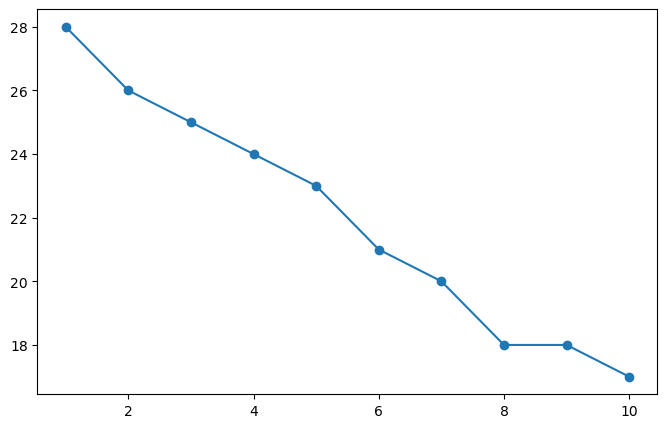

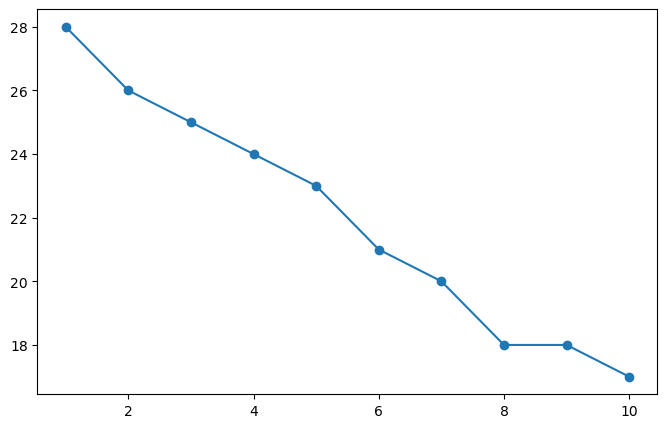

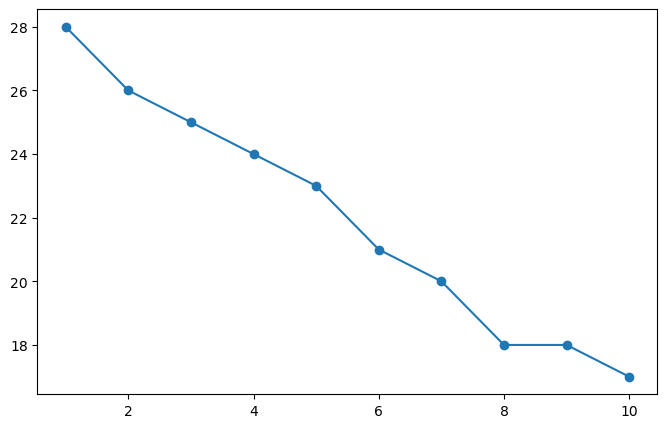

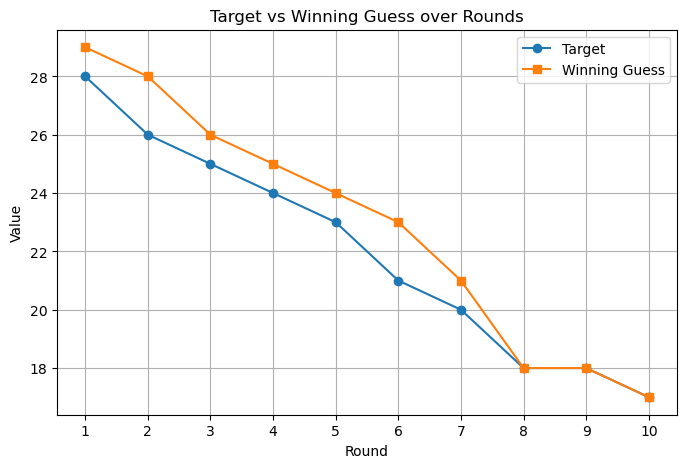

In [11]:
winning_guesses = []

for i, row in result.iterrows():
    t = row['Target']
    # get guesses for that round
    guesses_this = [row[f'Group_{j+1}'] for j in range(20)]
    diffs = [abs(g - t) for g in guesses_this]
    winning_guesses.append(guesses_this[diffs.index(min(diffs))])

result['Winning_Guess'] = winning_guesses

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(result['Round'], result['Target'], marker='o', label='Target')
plt.plot(result['Round'], result['Winning_Guess'], marker='s', label='Winning Guess')

plt.title('Target vs Winning Guess over Rounds')
plt.xlabel('Round')
plt.ylabel('Value')
plt.xticks(result['Round'])
plt.legend()
plt.grid(True)
plt.show()



##  <font color='#D4AF37'> Algorithm competition (3 points + bonus points) </font>
Write a Python function (named the function *group_name_ac1*)
- takes 3 input:
  - A boolean variable named ini
  - A float named p
  - A list named G containing guesses of other teams (including your guess) from previous round starting from second round.

- and output an <span style="color:red">**integer**</span> number between [0,100].


Notes:
- In competition, the guessing game is played for 10 rounds.
- $p$ can be any non-negative float, and will not be announced until the competition started. Remember in comprehension section, we are looking at only a specific case of $p$.
- $p$ is fixed throughout the ten rounds being played.
- If too many winners, we will have additional 10-round runs with different $p$ values.

**All guessing numbers** must be <span style="color:red">**integers**</span> between 0 and 100. Violations immediately disqualify your programs.


### Sample
Here is a sample of a Python function that simply:
- Return a guess **3** in the first round (ini is an indicator if the current round is the first round)
- Return the rounded number of the result $p \times N^{-1} \sum_{i=1}^N c_i$, where $c_i$ are all the guessing numbers from previous round. (Level-one reasoning strategy).
    
```python
 def submitC(ini,p,A):
        
        if ini:
            #first round guess
            return 3
        else:
            #subsequent round guess, just round up my guess to win
            guess_mean = sum(A)/len(A);
            return round(p*guess_mean)
```

In [ ]:
###### YOUR ALGORITHM HERE ######
def submitC(ini,p,G):
        '''function that returns a whole number for the guessing game'''
        if ini:
            '''first round guess, pick a guess you think is the best'''
            return
        else:
            '''subsequent round guess'''
            '''code up any algorithm with your ideas, the code below is only a sample.'''
            return

### Test run for your code below
You can copy the Python code in this cell to check if your Python function above works as intended. <br>
<span style="color:red">**IMPORTANCE**</span> All the return values from your function must be <span style="color:red">**integers**</span> between 0 and 100.

```python
#First round (blind guesses)
ini = True
c1 = submitC(ini,[])
print('Round 1 guess: ',c1)

#Second round (observed guesses from previous round)
ini = False
import random
# Simulate random guesses from other players
guesses_prv = [random.randint(0, 100) for _ in range(25)]
print(guesses_prv)
c2 = submitC(ini,guesses_prv)
print('Round 2 guess: ',c2)
```